# Ford Car Price Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d adhurimquku/ford-car-price-prediction

Dataset URL: https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction
License(s): CC0-1.0
100%|█████████████████████████████████████████| 174k/174k [00:00<00:00, 185kB/s]
100%|█████████████████████████████████████████| 174k/174k [00:00<00:00, 185kB/s]


In [3]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Ford Car Price Prediction/ford-car-price-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Ford Car Price Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('ford.csv')

In [6]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [7]:
df.shape

(17966, 9)

In [8]:
df.size

161694

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  int64  
 1   year          17812 non-null  int64  
 2   price         17812 non-null  int64  
 3   transmission  17812 non-null  int64  
 4   mileage       17812 non-null  int64  
 5   fuelType      17812 non-null  int64  
 6   tax           17812 non-null  int64  
 7   mpg           17812 non-null  float64
 8   engineSize    17812 non-null  float64
dtypes: float64(2), int64(7)
memory usage: 1.4 MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,17966.0,2016.866470,2.050336,1996.0,2016.0,2017.0,2018.0,2060.0
price,17966.0,12279.534844,4741.343657,495.0,8999.0,11291.0,15299.0,54995.0
mileage,17966.0,23362.608761,19472.054349,1.0,9987.0,18242.5,31060.0,177644.0
tax,17966.0,113.329456,62.012456,0.0,30.0,145.0,145.0,580.0
mpg,17966.0,57.906980,10.125696,20.8,52.3,58.9,65.7,201.8
engineSize,17966.0,1.350807,0.432367,0.0,1.0,1.2,1.5,5.0


In [10]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(154)

In [12]:
df.nunique()

model              24
year               23
price            3511
transmission        3
mileage         13528
fuelType            5
tax                36
mpg                90
engineSize         16
dtype: int64

In [14]:
df['model'].unique()

array([' Fiesta', ' Focus', ' Puma', ' Kuga', ' EcoSport', ' C-MAX',
       ' Mondeo', ' Ka+', ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge',
       ' Tourneo Connect', ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
       ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
       ' Escort', ' Transit Tourneo', 'Focus'], dtype=object)

In [13]:
df['model'].value_counts()

model
 Fiesta                   6557
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Escort                      1
 Transit Tourneo             1
Focus                        1
Name: count, dtype: int64

## Data Visualization

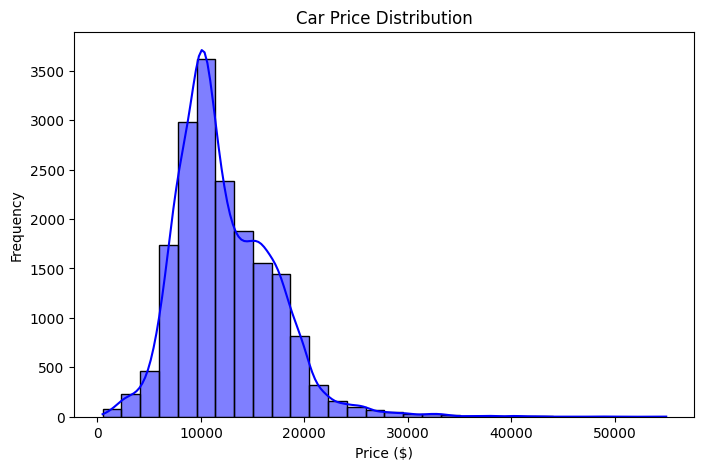

In [29]:
# Histogram – Price Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Car Price Distribution')
plt.show()

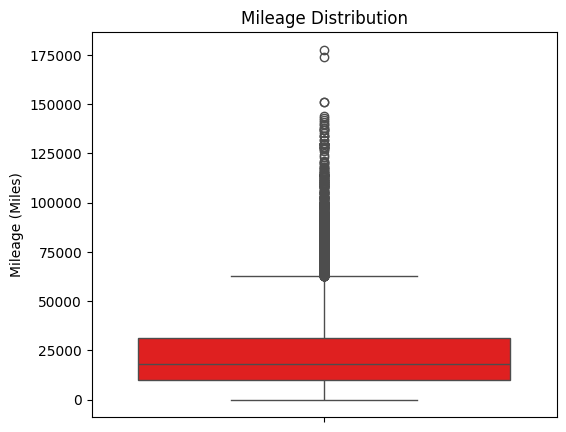

In [30]:
# Box Plot – Mileage Distribution

plt.figure(figsize=(6, 5))
sns.boxplot(y=df['mileage'], color='red')
plt.ylabel('Mileage (Miles)')
plt.title('Mileage Distribution')
plt.show()

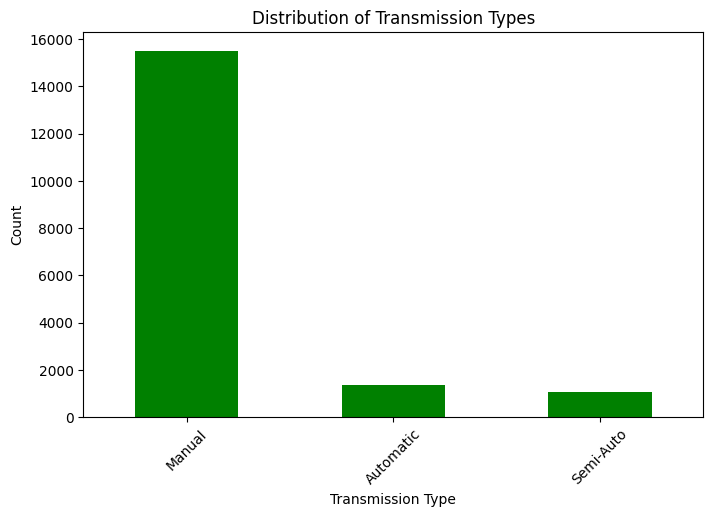

In [31]:
# Bar Chart – Transmission Type Count

plt.figure(figsize=(8, 5))
df['transmission'].value_counts().plot(kind='bar', color='green')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.title('Distribution of Transmission Types')
plt.xticks(rotation=45)
plt.show()

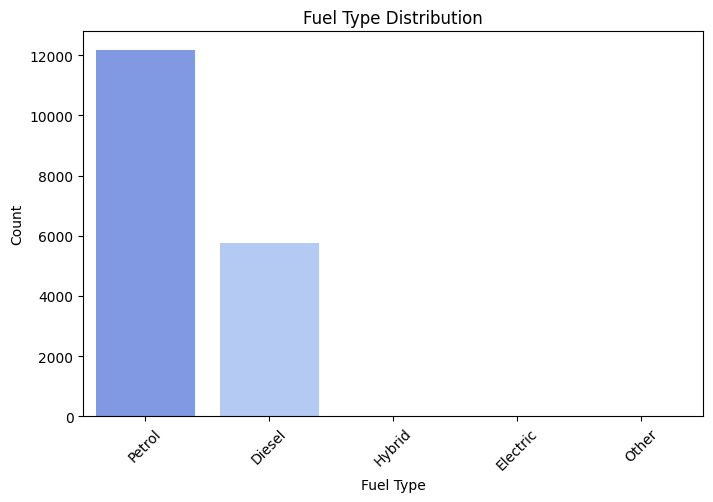

In [32]:
# Count Plot – Fuel Type Distribution

plt.figure(figsize=(8, 5))
sns.countplot(x=df['fuelType'], palette='coolwarm')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.title('Fuel Type Distribution')
plt.xticks(rotation=45)
plt.show()

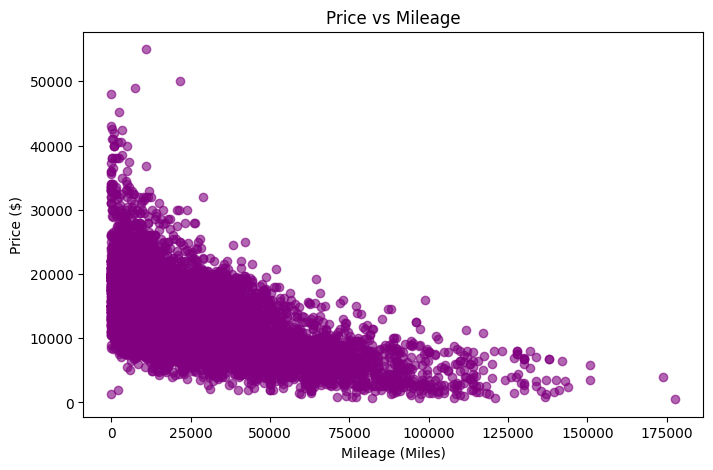

In [33]:
# Scatter Plot – Price vs Mileage

plt.figure(figsize=(8, 5))
plt.scatter(df['mileage'], df['price'], color='purple', alpha=0.6)
plt.xlabel('Mileage (Miles)')
plt.ylabel('Price ($)')
plt.title('Price vs Mileage')
plt.show()

## Data Preprocessing

In [ ]:
# Dropping the duplicates

df.drop_duplicates(inplace=True)

In [16]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['transmission'] = le.fit_transform(df['transmission'])
df['fuelType'] = le.fit_transform(df['fuelType'])
df['model'] = le.fit_transform(df['model'])

In [17]:
X = df.drop(columns=['price'])
y = df['price']

In [18]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Standardizing numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building

In [20]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [21]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [22]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging, Decision_tree,Svr,Knn]

Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

Score

[0.7056995980722613,
 0.9343644976615906,
 0.9262807436083965,
 0.6157170476163525,
 0.9141441195376373,
 0.9209838728612374,
 0.8828933158196193,
 0.1404396547991248,
 0.919136149854947]

## Model Evaluation

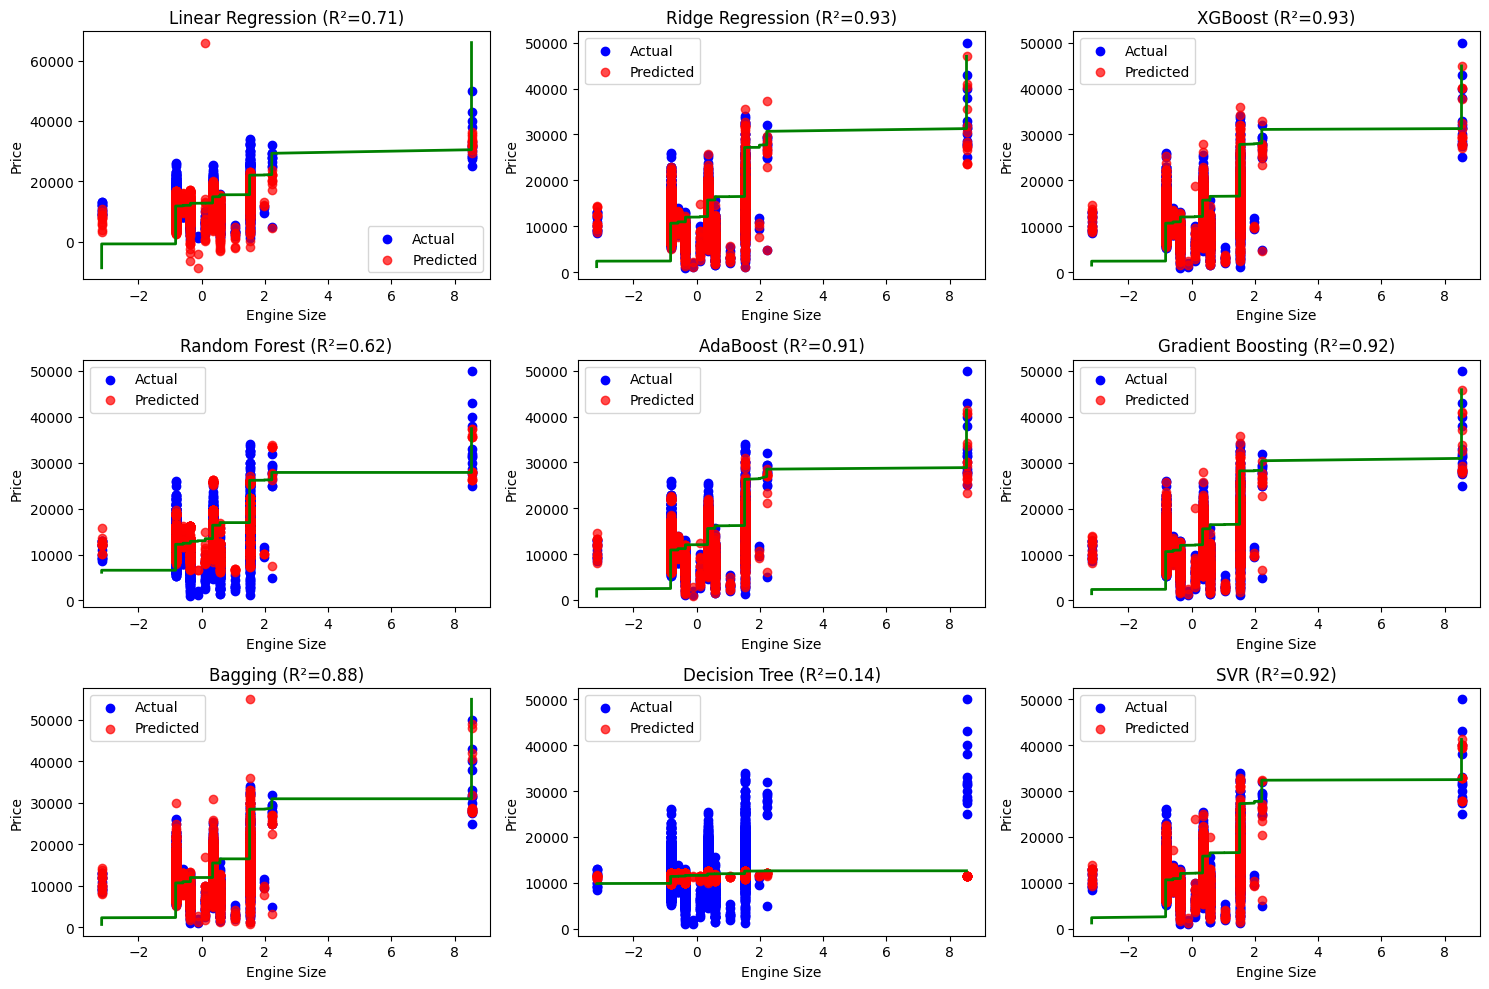

Linear Regression: R² Score = 0.7057
Ridge Regression: R² Score = 0.9344
XGBoost: R² Score = 0.9263
Random Forest: R² Score = 0.6157
AdaBoost: R² Score = 0.9141
Gradient Boosting: R² Score = 0.9210
Bagging: R² Score = 0.8829
Decision Tree: R² Score = 0.1404
SVR: R² Score = 0.9191
KNN: R² Score = 0.7057


In [25]:
model_names = ["Linear Regression", "Ridge Regression", "XGBoost", "Random Forest", "AdaBoost", "Gradient Boosting", "Bagging", "Decision Tree", "SVR", "KNN"]

plt.figure(figsize=(15, 10))

# Convert X_test back to DataFrame for plotting
X_test_df = pd.DataFrame(X_test, columns=X.columns)

for i, model in enumerate(model_li):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    Score.append(r2)

    plt.subplot(3, 3, i+1)
    plt.scatter(X_test_df['engineSize'], y_test, color='blue', label="Actual")
    plt.scatter(X_test_df['engineSize'], y_pred, color='red', label="Predicted", alpha=0.7)
    plt.plot(np.sort(X_test_df['engineSize']), np.sort(y_pred), color='green', linewidth=2)
    plt.title(f"{model_names[i]} (R²={r2:.2f})")
    plt.xlabel("Engine Size")
    plt.ylabel("Price")
    plt.legend()

plt.tight_layout()
plt.show()

for name, score in zip(model_names, Score):
    print(f"{name}: R² Score = {score:.4f}")